In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [3]:
class ModeleSchelling:
    def __init__(self, M, p, L):
        self.M = M
        self.p = p
        self.L = L
        self.Ntot = 0
        self.grille = self.initialisation_grille()

    def initialisation_grille(self):
        grille = np.zeros((self.M, self.M), dtype=int)
        occupes = np.random.choice(
            self.M * self.M, size=int((1 - self.p) * self.M * self.M), replace=False
        )
        self.Ntot = len(occupes)

        for occupe in occupes:
            i, j = divmod(occupe, self.M)
            grille[i, j] = np.random.choice([-1, 1])

        return grille

    def afficher_grille(self, title):
        color = plt.imshow(self.grille, cmap="coolwarm", interpolation="nearest")
        plt.colorbar(color)
        plt.title(title)
        plt.show()

    def satisfaisante(self, x, y, agent):
        groupe = self.grille[agent[0], agent[1]]
        count_similaires = 0
        count_differents = 0

        voisins = []
        for i, j in list(itertools.product([x - 1, x, x + 1], [y - 1, y, y + 1])):
            if 0 <= i < self.M and 0 <= j < self.M and (i, j) != (x, y):
                voisins.append((i, j))

        for voisin in voisins:
            i, j = voisin
            case = self.grille[i, j]
            if case == 0:
                pass
            else:
                if case == groupe:
                    count_similaires += 1
                else:
                    count_differents += 1

        if count_similaires + count_differents == 0:
            return False
        else:
            return (
                float(count_similaires / (count_similaires + count_differents))
                >= self.L
            )

    def clusters(self):
        visited = np.zeros_like(self.grille, dtype=bool)
        clusters = []

        def dfs(i, j, groupe, cluster):  # Depth-First Search
            stack = [(i, j)]

            while stack:
                i, j = stack.pop()

                if (
                    0 <= i < self.M
                    and 0 <= j < self.M
                    and not visited[i, j]
                    and self.grille[i, j] == groupe
                ):
                    visited[i, j] = True
                    cluster.add((i, j))

                    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        stack.append((i + di, j + dj))

        added_clusters = set()

        for groupe in [-1, 1]:
            indices = np.argwhere((self.grille == groupe) & (~visited))
            for i, j in indices:
                current_cluster = set()
                dfs(i, j, groupe, current_cluster)

                if current_cluster and frozenset(current_cluster) not in added_clusters:
                    clusters.append((groupe, len(current_cluster)))
                    added_clusters.add(frozenset(current_cluster))

        return clusters

    def coef_segregation(self):
        S = 0
        clusters = self.clusters()
        for i in range(len(clusters)):
            S += int(clusters[i][1]) ** 2
        return S * 2 / (self.Ntot**2)

    def simuler(self, T=400, move_satisfaits=True):
        for _t in range(1, int((1 - self.p) * self.M**2 * T)):
            agents = [
                (i, j)
                for i, row in enumerate(self.grille)
                for j, val in enumerate(row)
                if val != 0
            ]
            agent = agents[np.random.randint(0, len(agents) - 1)]

            while not move_satisfaits and self.satisfaisante(agent[0], agent[1], agent):
                agents.remove(agent)
                if len(agents) == 0:
                    break
                agent = agents[np.random.randint(0, len(agents) - 1)]

            cases_non_occupees = [
                (i, j)
                for i, row in enumerate(self.grille)
                for j, val in enumerate(row)
                if val == 0
            ]
            nouvelle_case = cases_non_occupees[
                np.random.randint(0, len(cases_non_occupees) - 1)
            ]

            while not self.satisfaisante(nouvelle_case[0], nouvelle_case[1], agent):
                cases_non_occupees.remove(nouvelle_case)
                if len(cases_non_occupees) == 0:
                    break
                nouvelle_case = cases_non_occupees[
                    np.random.randint(0, len(cases_non_occupees) - 1)
                ]

            self.grille[nouvelle_case[0]][nouvelle_case[1]] = self.grille[agent[0]][
                agent[1]
            ]
            self.grille[agent[0]][agent[1]] = 0
            cases_non_occupees.append(agent)
        self.afficher_grille(
            f"Configuration Finale de T={T} pour (M, p, L) = ({self.M},{self.p},{self.L})"
        )

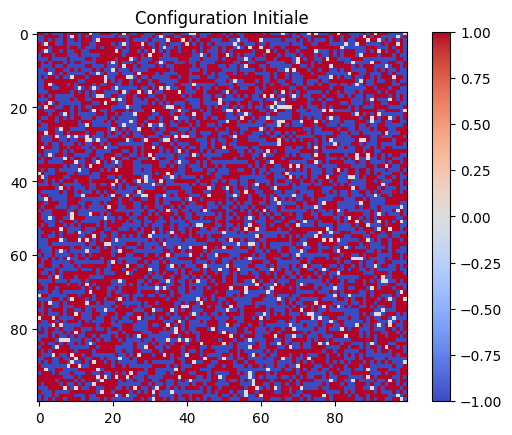

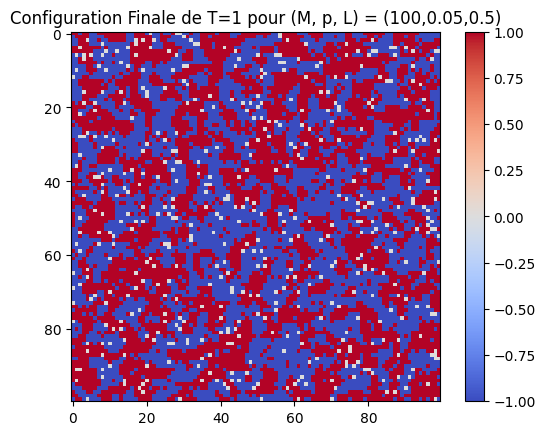

In [ ]:
M = 100
p = 5 / 100
L = 1 / 2

modele = ModeleSchelling(M, p, L)
modele.afficher_grille("Configuration Initiale")

for T in [1, 10, 100, 400]:
    modele.simuler(T, True)

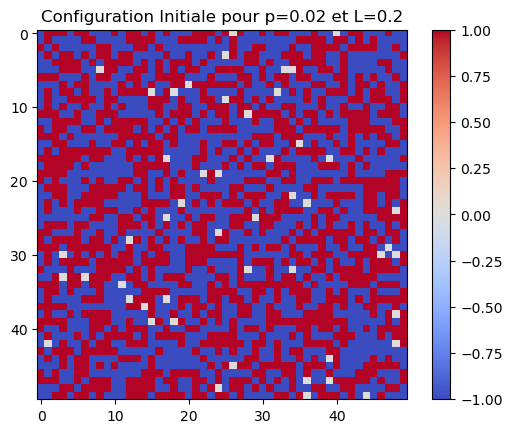

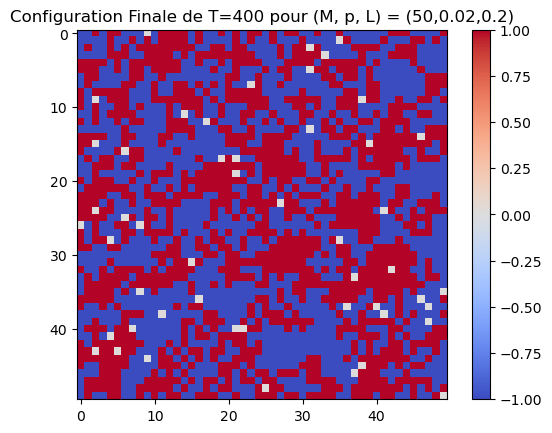

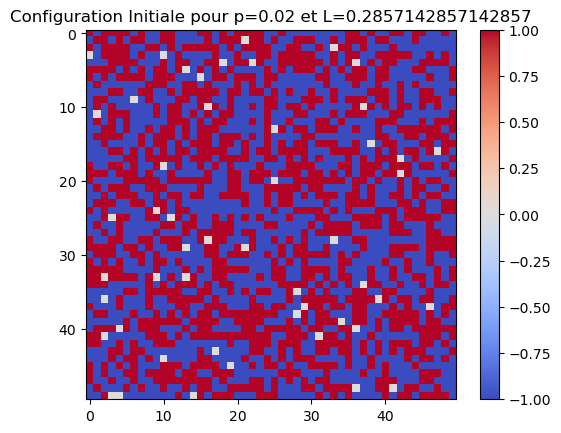

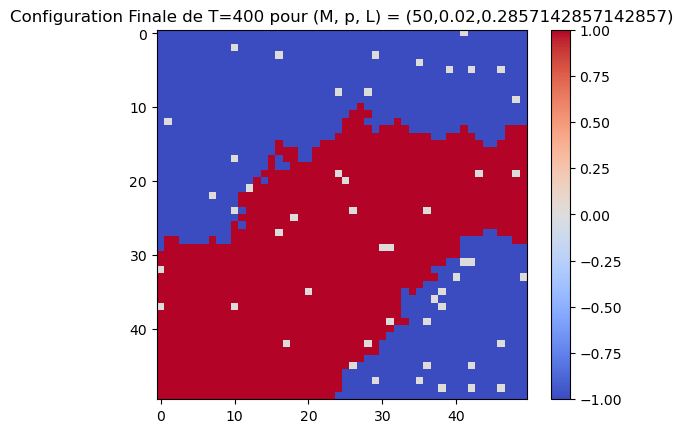

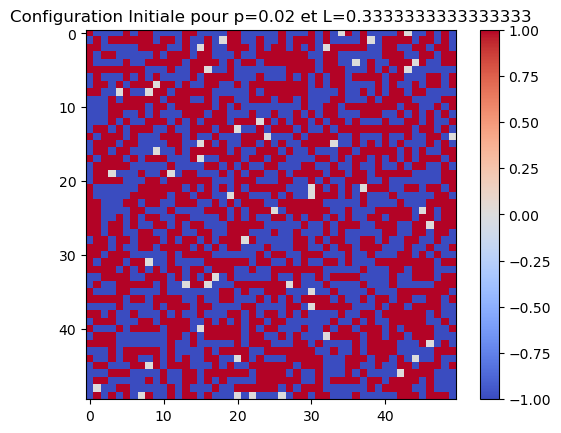

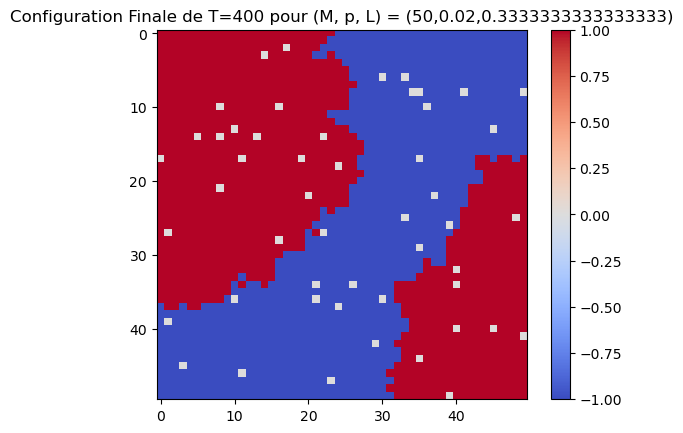

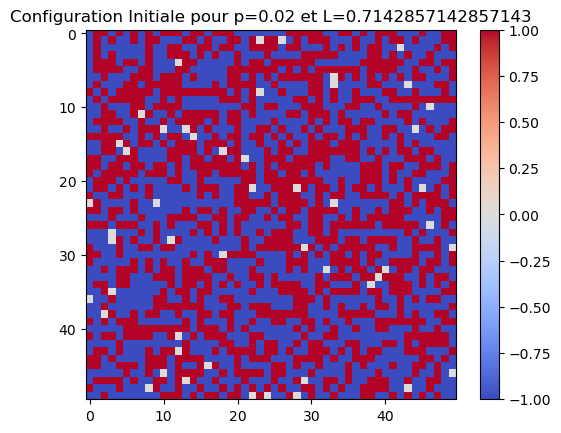

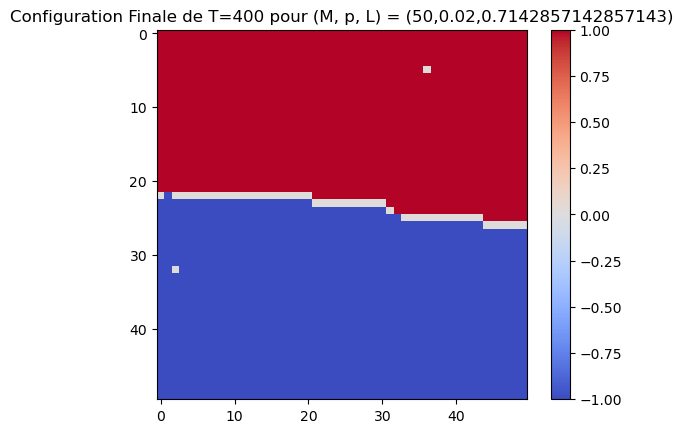

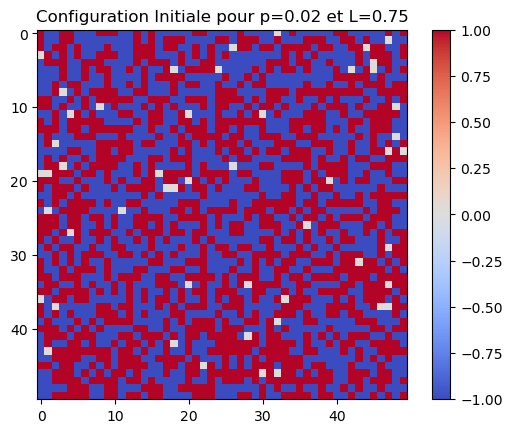

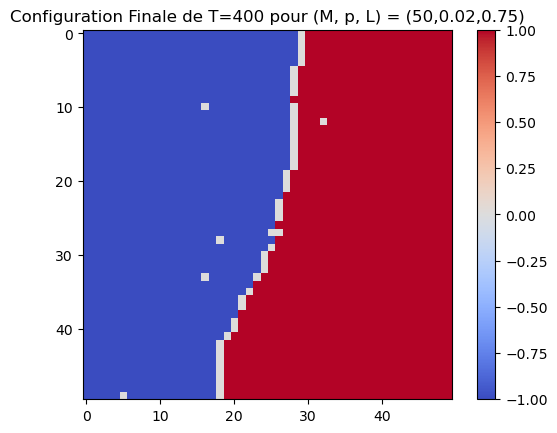

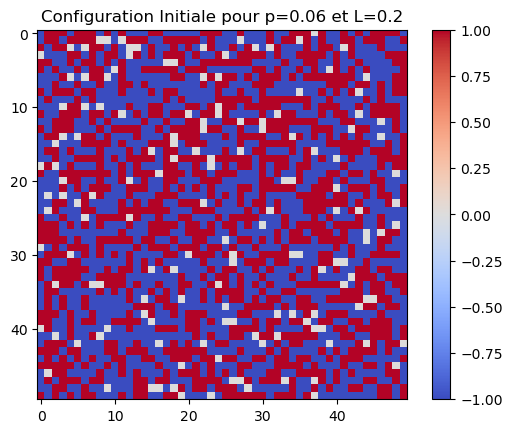

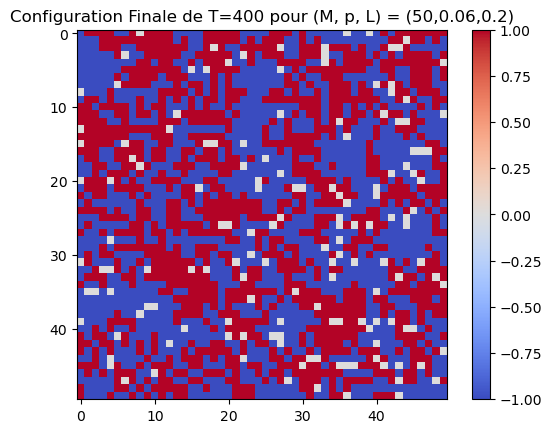

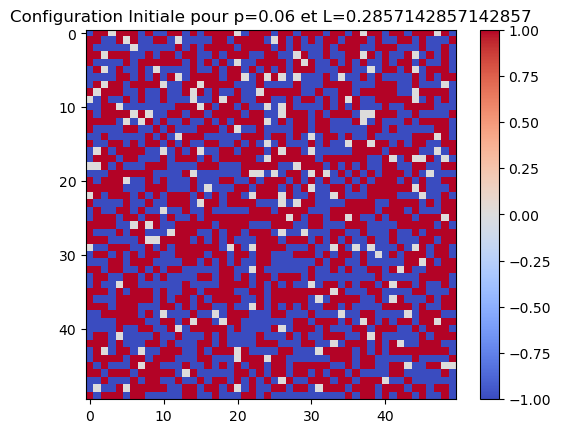

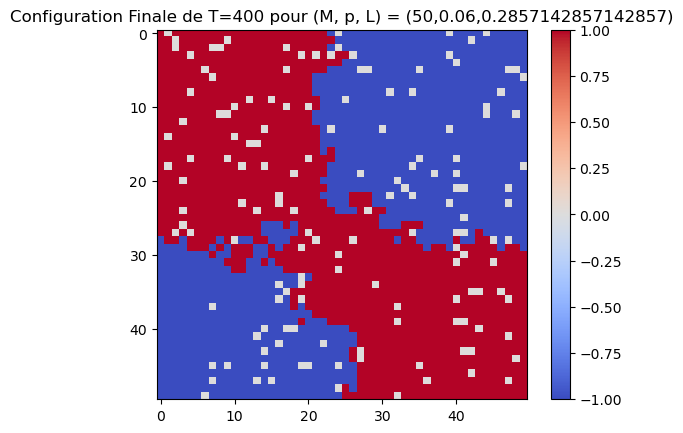

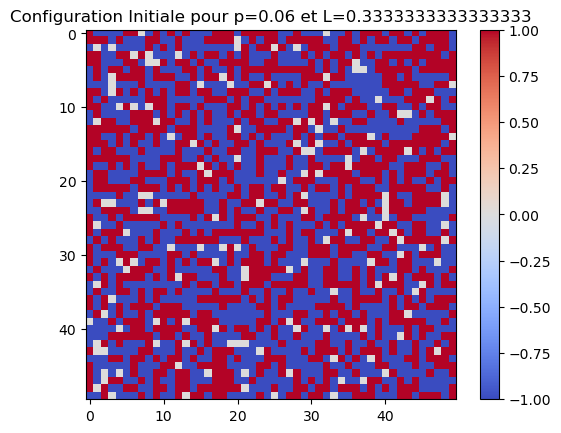

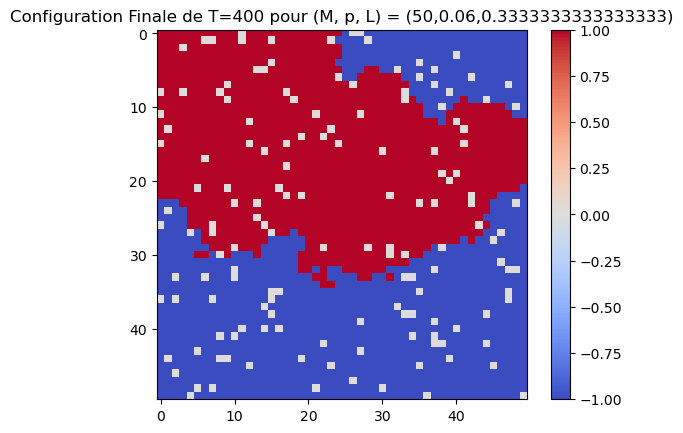

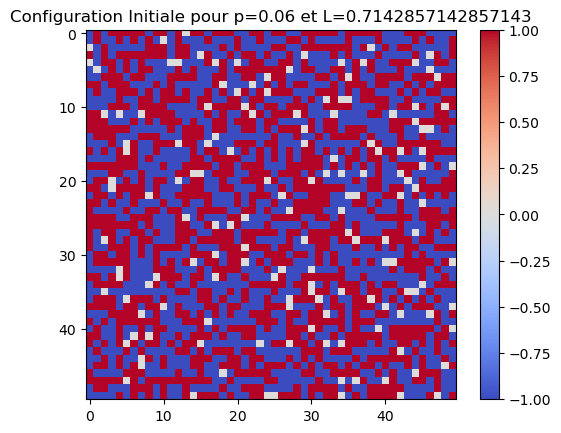

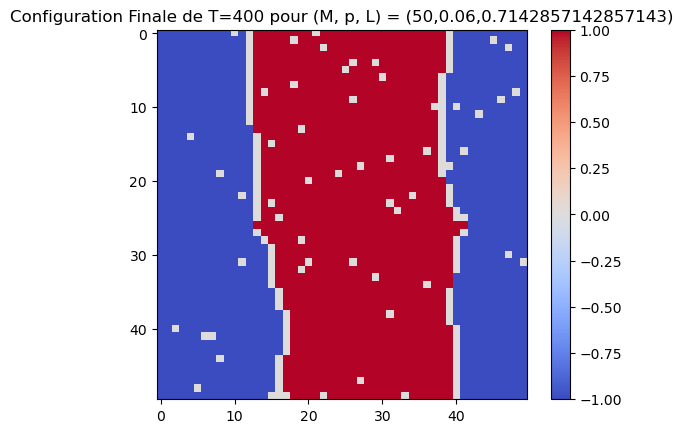

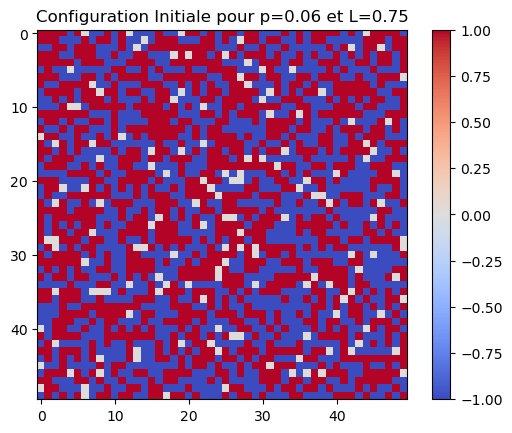

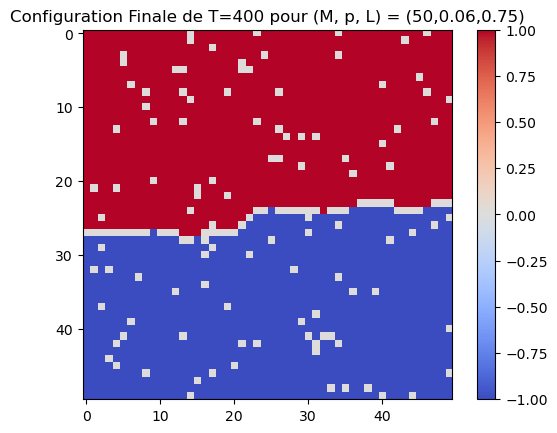

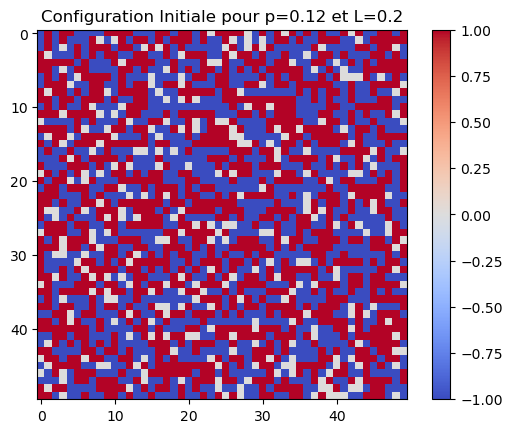

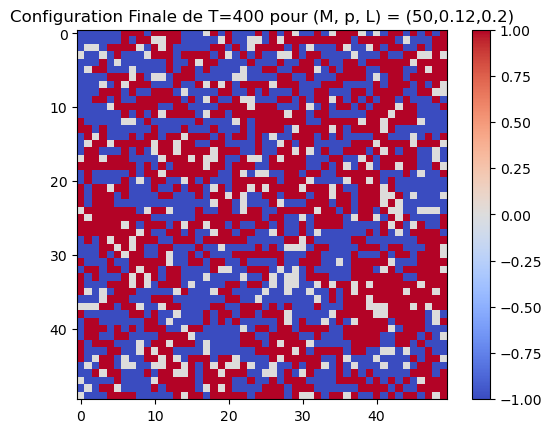

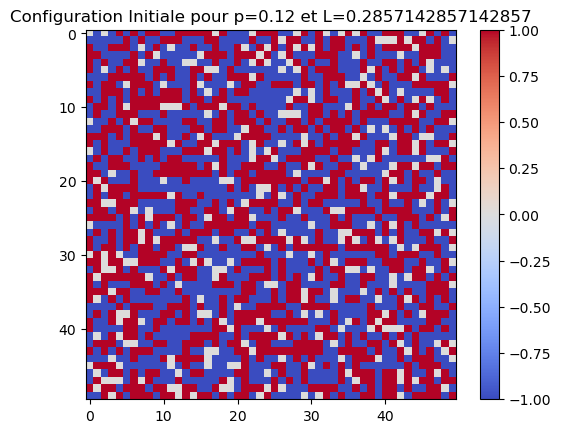

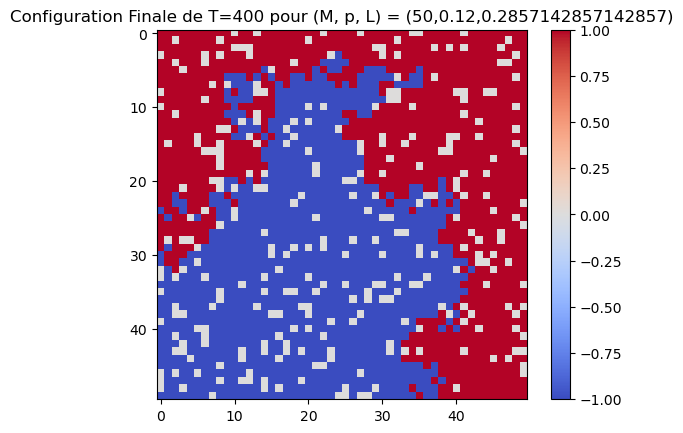

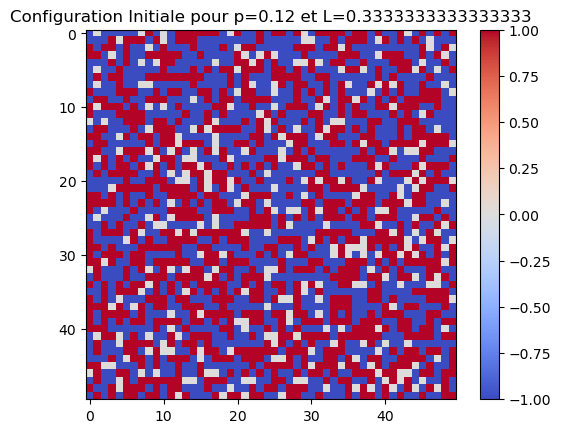

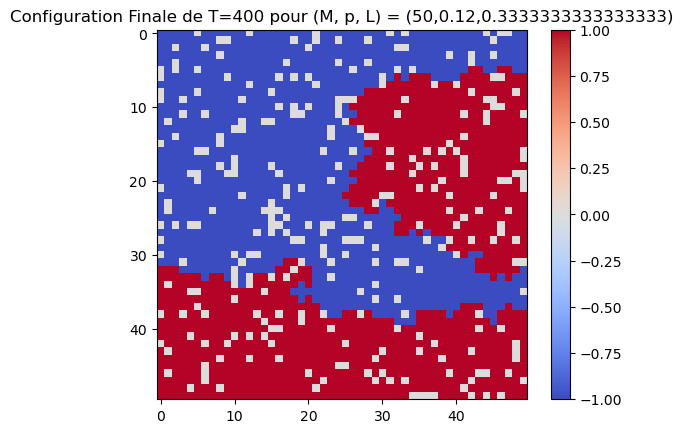

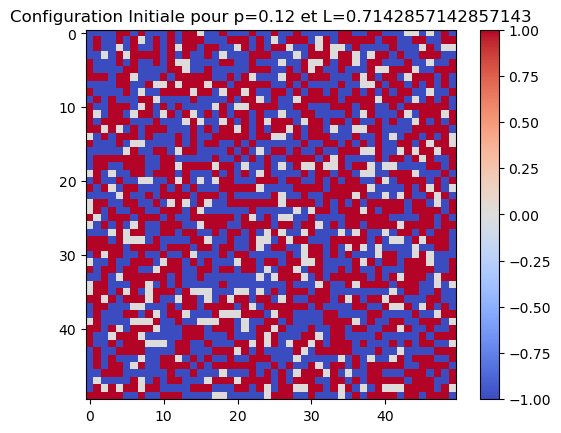

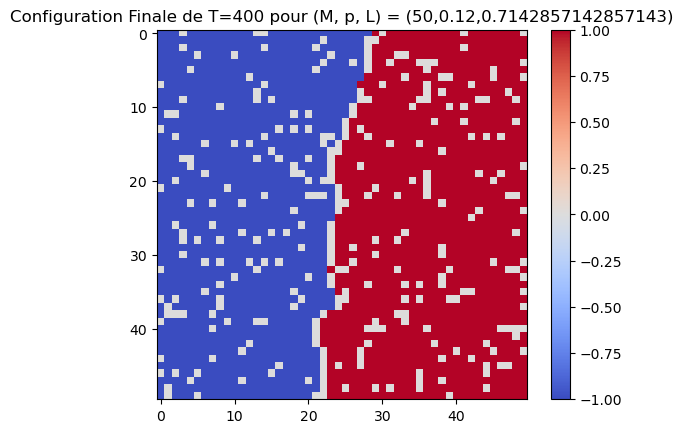

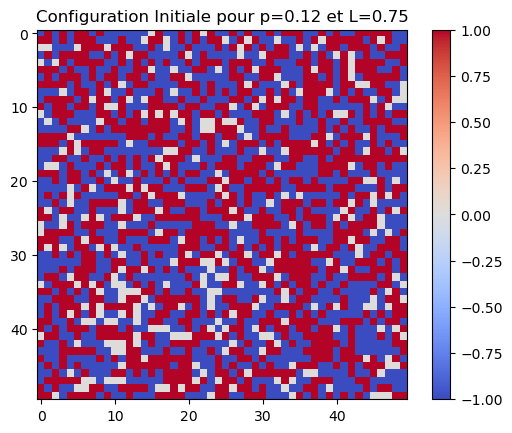

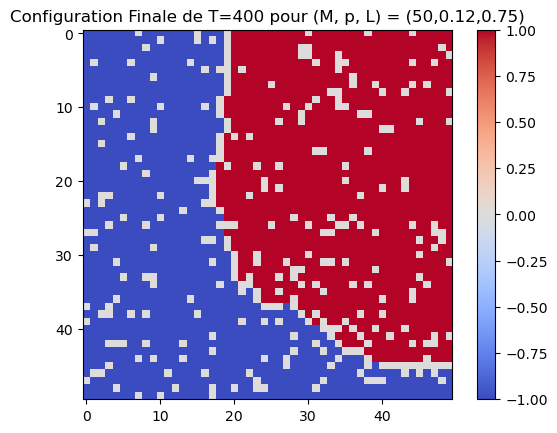

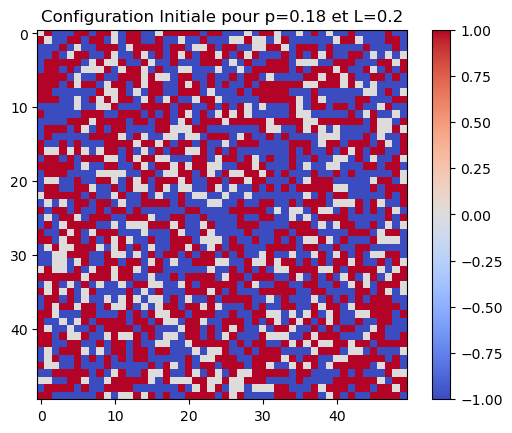

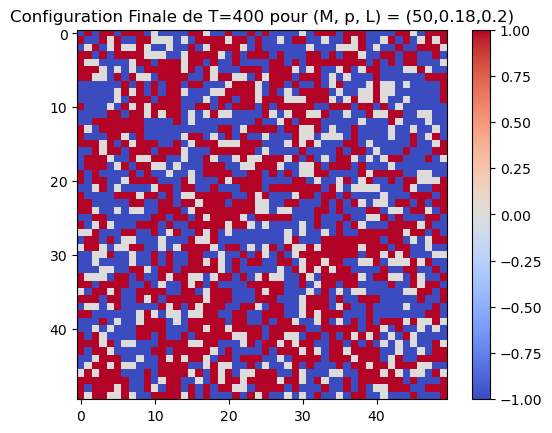

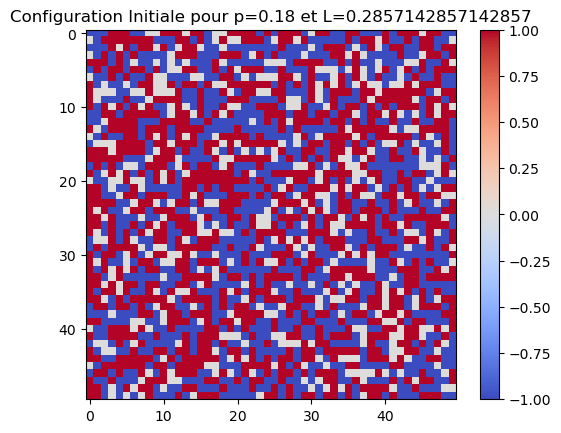

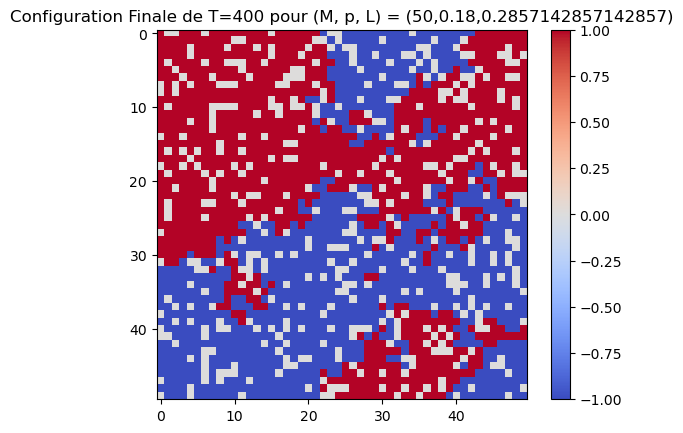

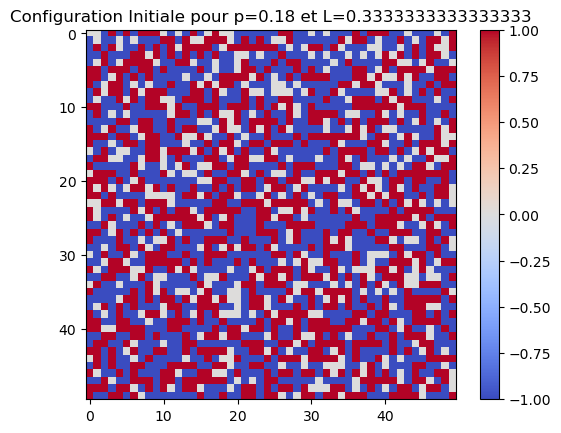

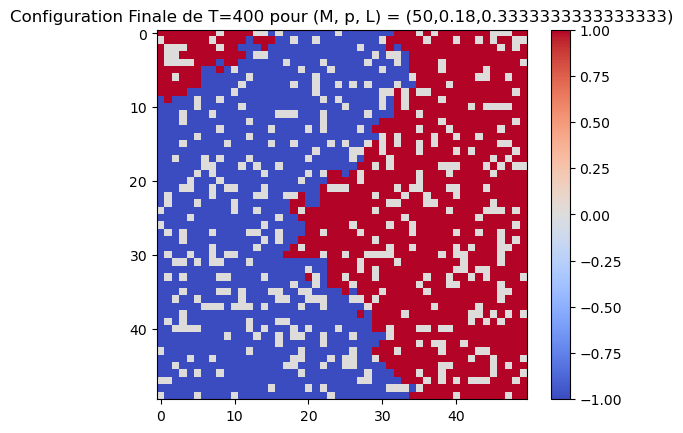

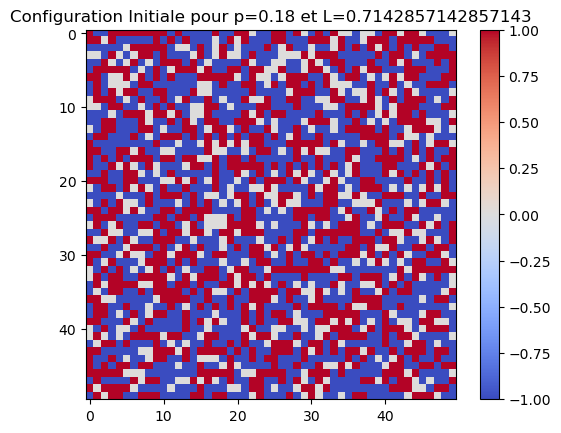

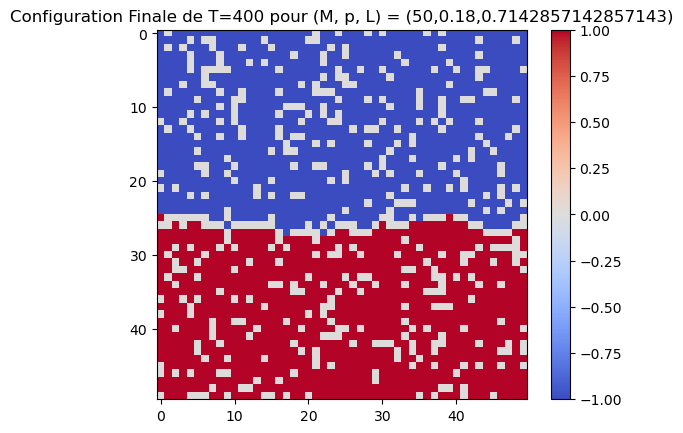

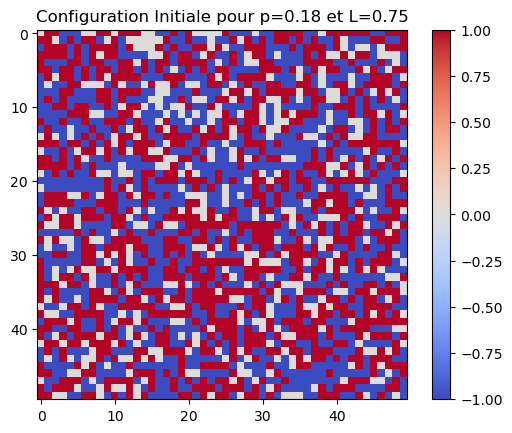

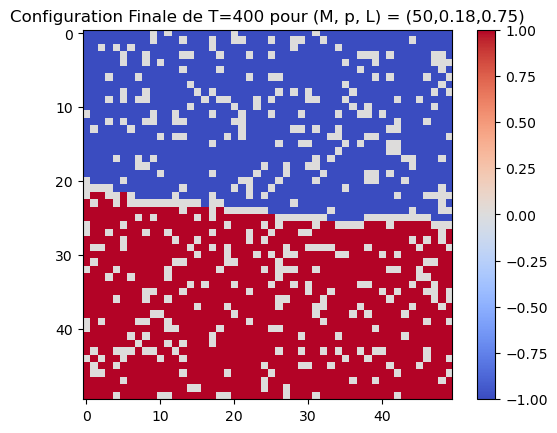

In [71]:
M = 50
T = 100
p_list = [2 / 100, 6 / 100, 12 / 100, 18 / 100]
L_list = [1 / 5, 2 / 7, 1 / 3, 5 / 7, 3 / 4]

for p in p_list:
    for L in L_list:
        modele = ModeleSchelling(M, p, L)
        modele.afficher_grille(f"Configuration Initiale pour p={p} et L={L}")
        modele.simuler(T, False)

In [6]:
M = 50
T = [1, 10, 100, 400]
p = 5 / 100
L = 2 / 7

S = []

modele = ModeleSchelling(M, p, L)
modele.afficher_grille("Configuration Initiale")

for t in T:
    modele.simuler(t, True)
    S.append(modele.coef_segregation())

plt.scatter(T, S, label="Coefficient de Segrégation")
plt.plot(T, S)
plt.legend()
plt.xlabel("T")
plt.ylabel("S")
plt.title("Evolution du coefficient de ségrégation S en fonction du temps T")

NameError: name 'random' is not defined

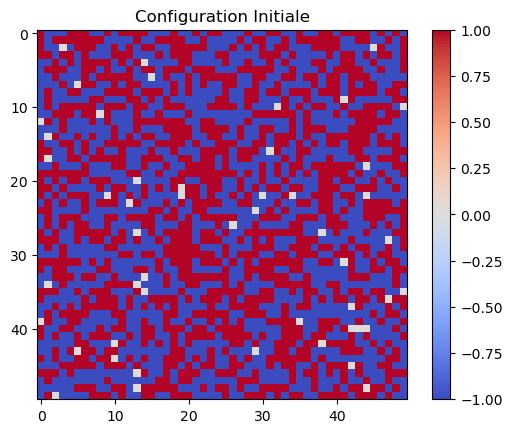

KeyboardInterrupt: 

In [95]:
M = 50
T = 400
p_list = [2 / 100, 6 / 100, 12 / 100, 18 / 100, 25 / 100]
L_list = range(0, 1, 4)

S = []

for p in p_list:
    for L in L_list:
        modele = ModeleSchelling(M, p, L)
        modele.afficher_grille("Configuration Initiale")
        modele.simuler(T, True)
        S.append(modele.coef_segregation())

    plt.scatter(L, S, label="Coefficient de Segrégation")
    plt.plot(T, S)
    plt.legend()
    plt.xlabel("L")
    plt.ylabel("S")
    plt.title(
        f"Evolution du coefficient de ségrégation S en fonction de la tolérance L = {L} pour p = {p}"
    )

In [ ]:
M = 30
T = 400
p = 5 / 100
L = 2 / 7

modele = ModeleSchelling(M, p, L)
modele.afficher_grille("Configuration Initiale")
modele.simuler(T, False)

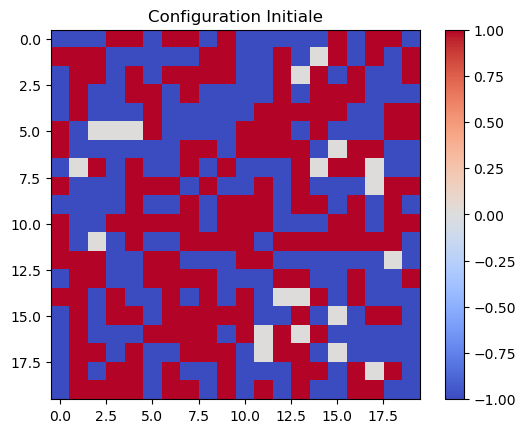

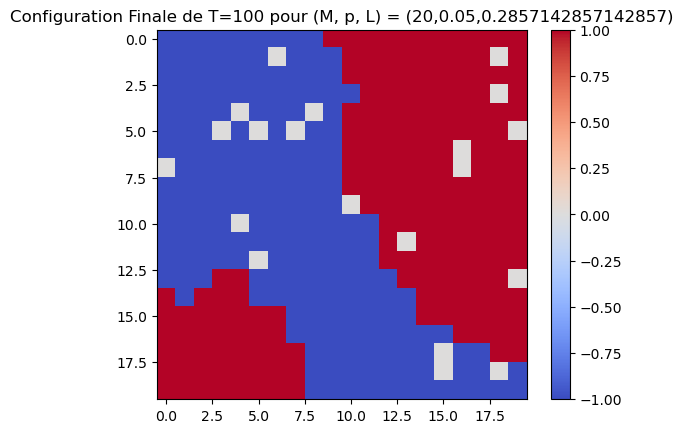

In [10]:
M = 20
T = 100
p = 5 / 100
L = 2 / 7

modele = ModeleSchelling(M, p, L)
modele.afficher_grille("Configuration Initiale")
modele.simuler(T, False)